# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration: Answer Questions </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Dinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Do Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


---

## Import libraries


In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Read data and split into numeric and categorical set

In [2]:
#read data
# raw_data = pd.read_csv('../data/raw_data.csv')
raw_data = pd.read_csv('../data/raw_data.csv')

In [3]:
raw_data_numeric = raw_data.select_dtypes(include='number')
raw_data_categorical = raw_data.select_dtypes(exclude='number')

## Question 1

**Question**: What is the trend of changes in features over time (datetimeEpoch)?

**Benefit of solving this question**: Discovering the patterns of weather changes over many years helps us predict the weather.

**How to answer the question**: We will plot the features with datetime.

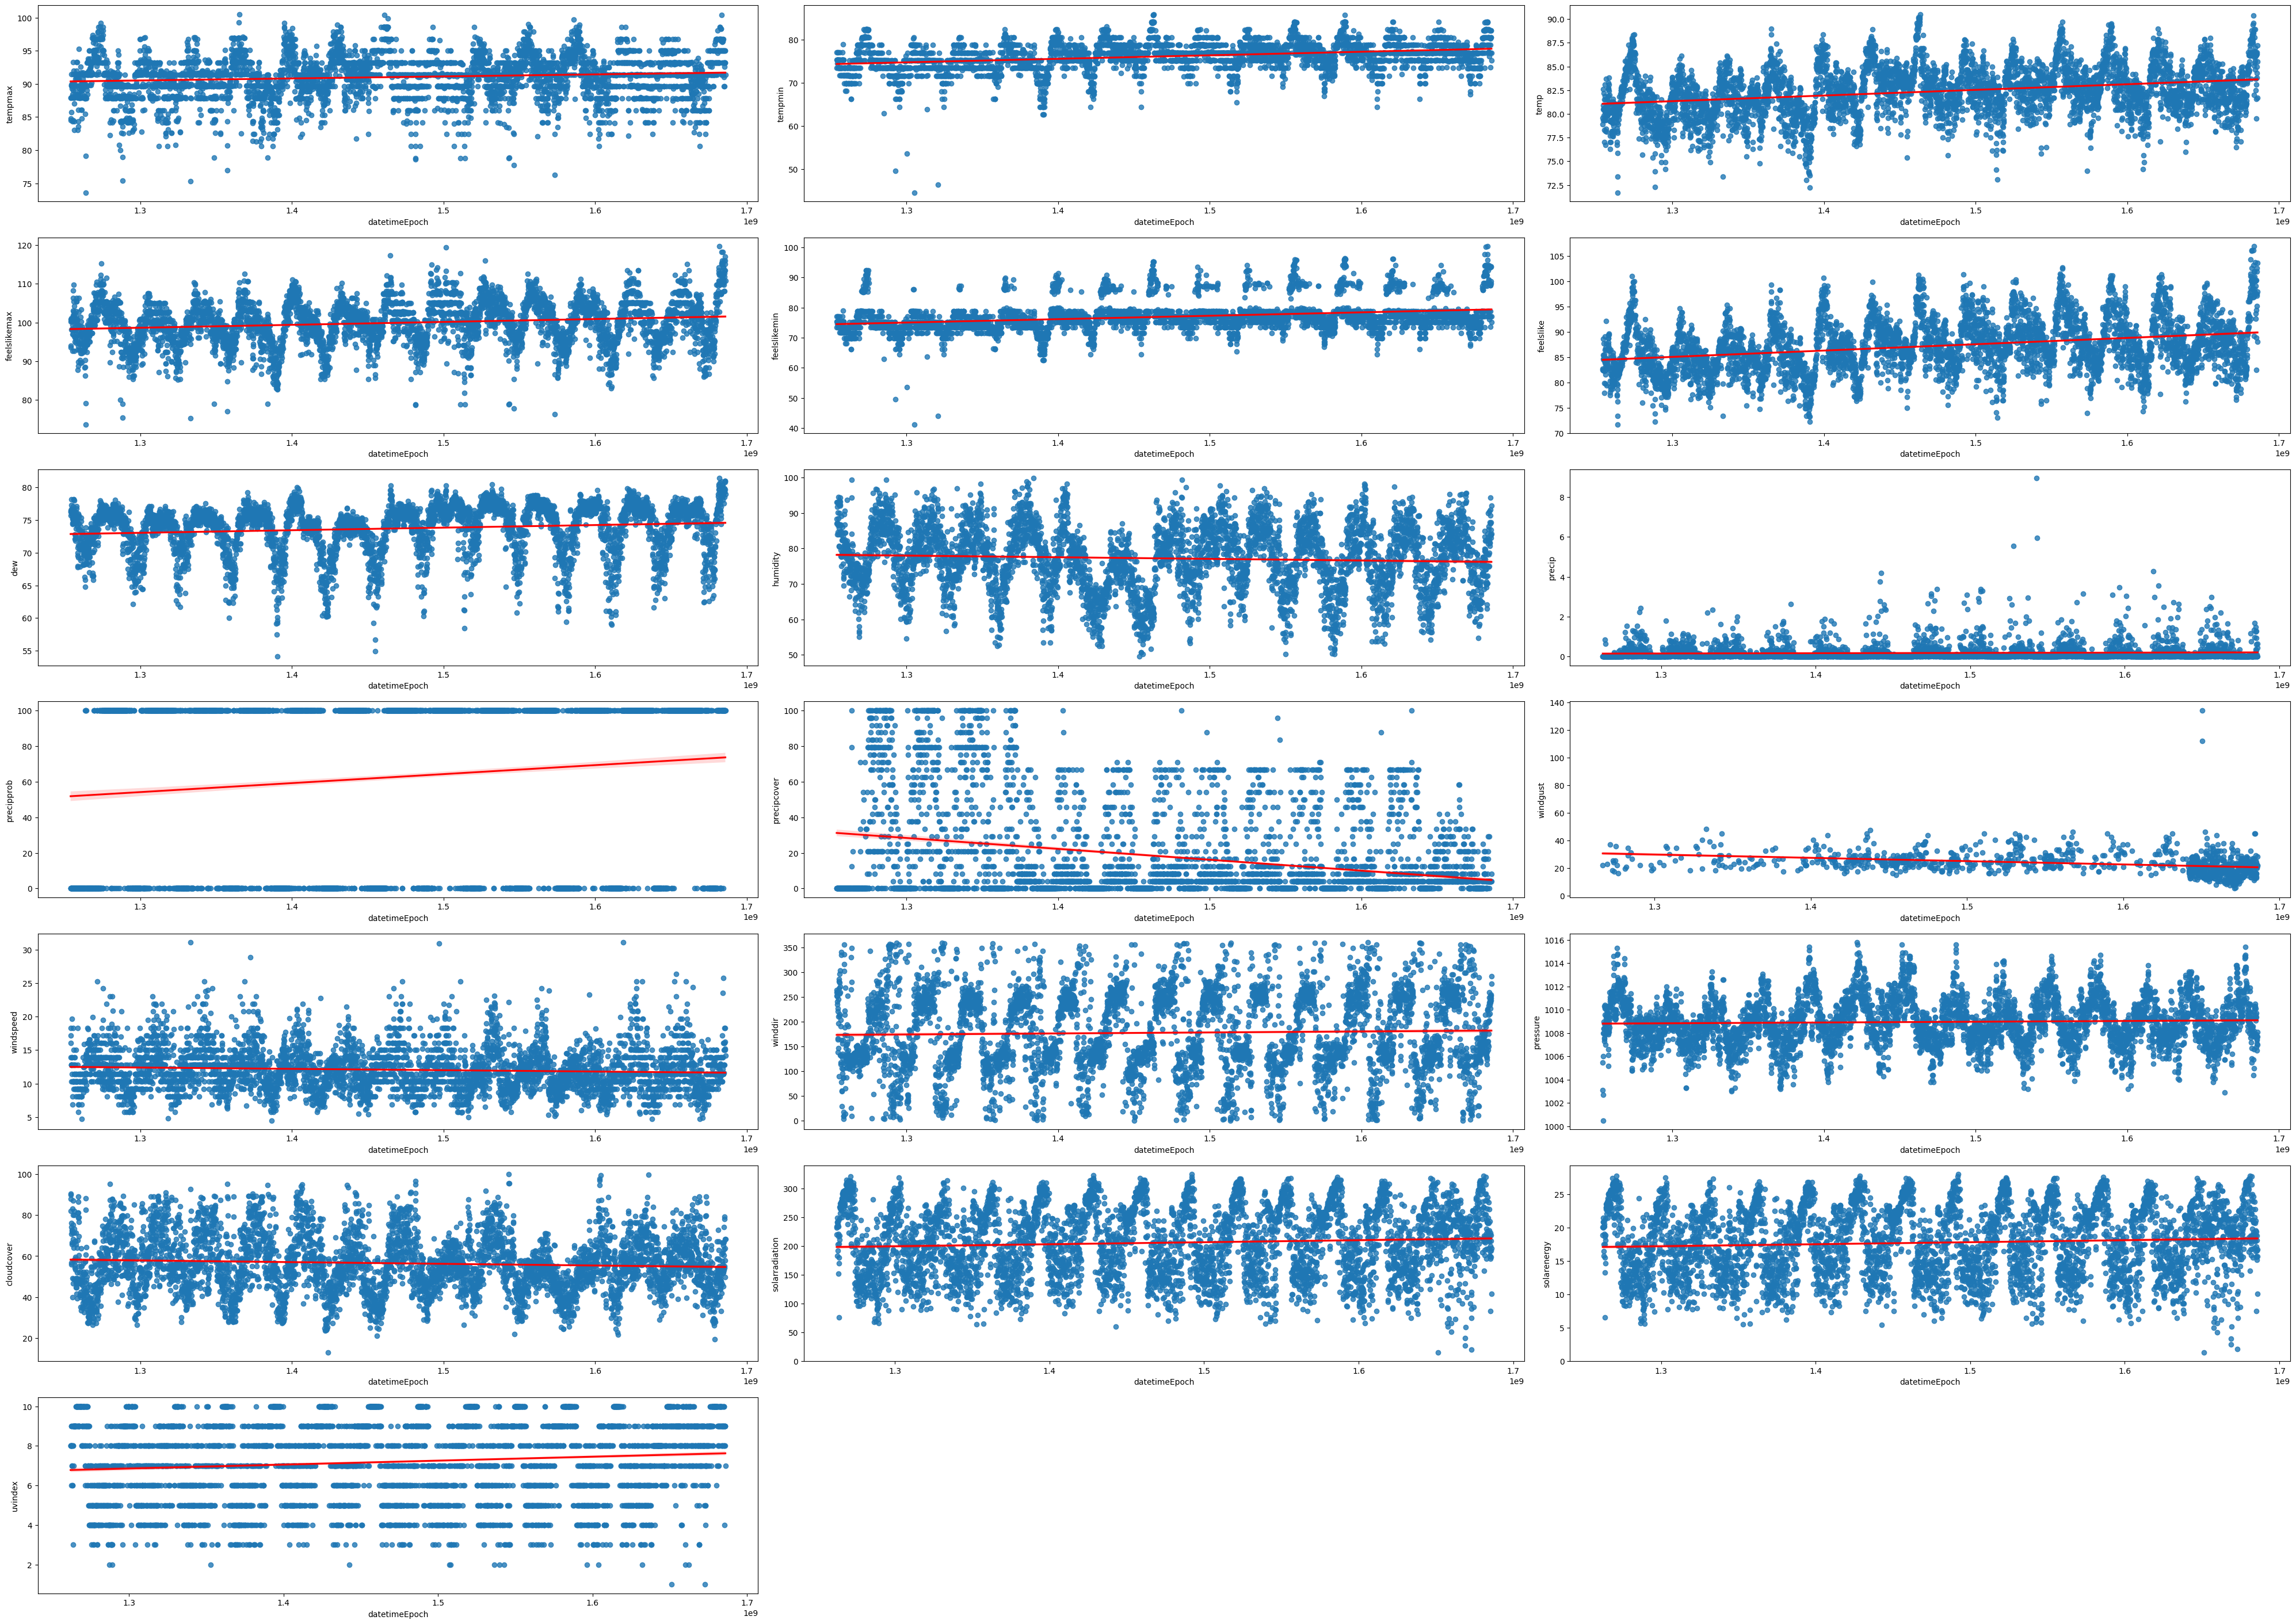

In [4]:
#draw plot for numeric data to get the relationship between datetimeEpoch and other variables

plt.figure(figsize=(40, 40))  # create a new figure with a larger size
cols = list(raw_data_numeric.columns)  # get the column names
remove_cols = ['snow', 'snowdepth', 'visibility', 'sunriseEpoch', 'sunsetEpoch',
               'moonphase', 'datetimeEpoch', 'severerisk']

for col in remove_cols:
  cols.remove(col)

for i in range(len(cols)):
    plt.subplot(10, 3, i + 1)  # create a subplot for each column
    #sns.scatterplot(x='datetimeEpoch', y=cols[i], data=raw_data_numeric)
    sns.regplot(x='datetimeEpoch', y=cols[i], data=raw_data_numeric, line_kws={"color": "red"})

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the figure

**Conclusion**: <br>
- Over time, Ho Chi Minh City is experiencing a `noticeable warming trend`, evident in the rising temperature-related indices like 'tempmax,' 'tempmin,' 'temp,' 'feelslikemax,' 'feelslikemin,' and 'feelslike.' This warming, likely linked to climate change, poses concerns for the region.

- The `increasing temperatures` are accompanied by a corresponding `rise` in the `dew` index, indicating heightened humidity levels. This interplay of factors has implications for various sectors, including agriculture and public health.

- A unique observation is the simultaneous `increase in precipitation` probability and `decrease in precipitation cover`. This might signify changing precipitation patterns, impacting water resource management and flood control strategies.

- Additionally, the `'uvindex' shows an upward trend`, signaling intensified ultraviolet radiation. This has implications for public health, emphasizing the need for increased awareness and protective measures.

- In summary, the data suggests a complex scenario in Ho Chi Minh City, driven by `climate change` and local dynamics, with potential impacts on multiple aspects of life. Further research is crucial for a comprehensive understanding and effective adaptation strategies.

## Question 2

**Question**: What is the weather condition of a year?

**Benefit of solving this question**: We can predict the condition(rain, not rain)?

**How to answer the question**: We need to one hot encoded the icon column and plot the data with datetime.

In [5]:
temp = raw_data.copy()
encoder = OneHotEncoder(sparse_output=False)
encoded_col = encoder.fit_transform(temp['icon'].values.reshape(-1, 1)).astype(int)
encoded_df = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out(['icon']))
encoded_df.head()

icon_clear-day  icon_cloudy  icon_partly-cloudy-day  icon_rain
0               0            0                       1          0
1               0            1                       0          0
2               0            0                       1          0
3               0            0                       1          0
4               0            0                       1          0

In [6]:
#concatenate the encoded dataframe with the original dataframe
temp = pd.concat([temp, encoded_df], axis=1)
#remove the original column
temp.drop('icon', axis=1, inplace=True)

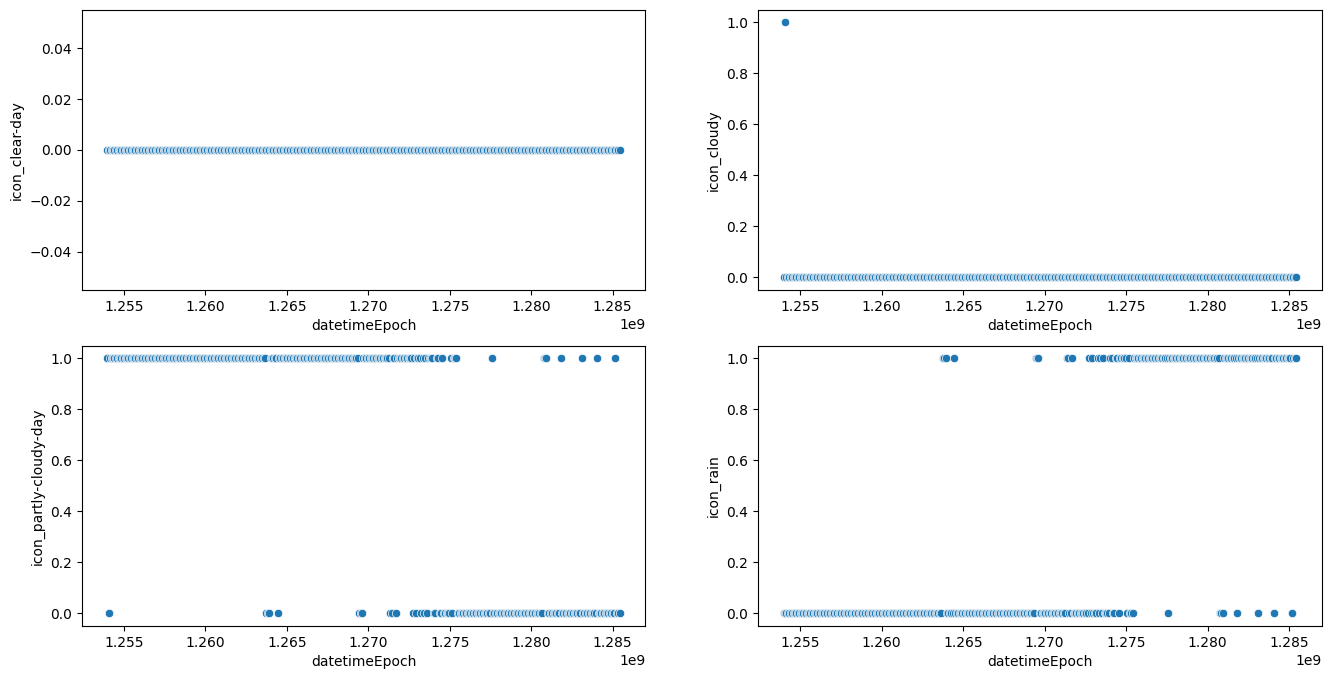

In [7]:
#draw plot for categorical data to get the relationship between datetimeEpoch and other variables
plt.figure(figsize=(16, 8))  # create a new figure with a larger size
cols = ['icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain']
for col in cols:
    plt.subplot(2, 2, cols.index(col) + 1)  # create a subplot for each column
    sns.scatterplot(x='datetimeEpoch', y=col, data=temp.head(365)) #only draw the first year

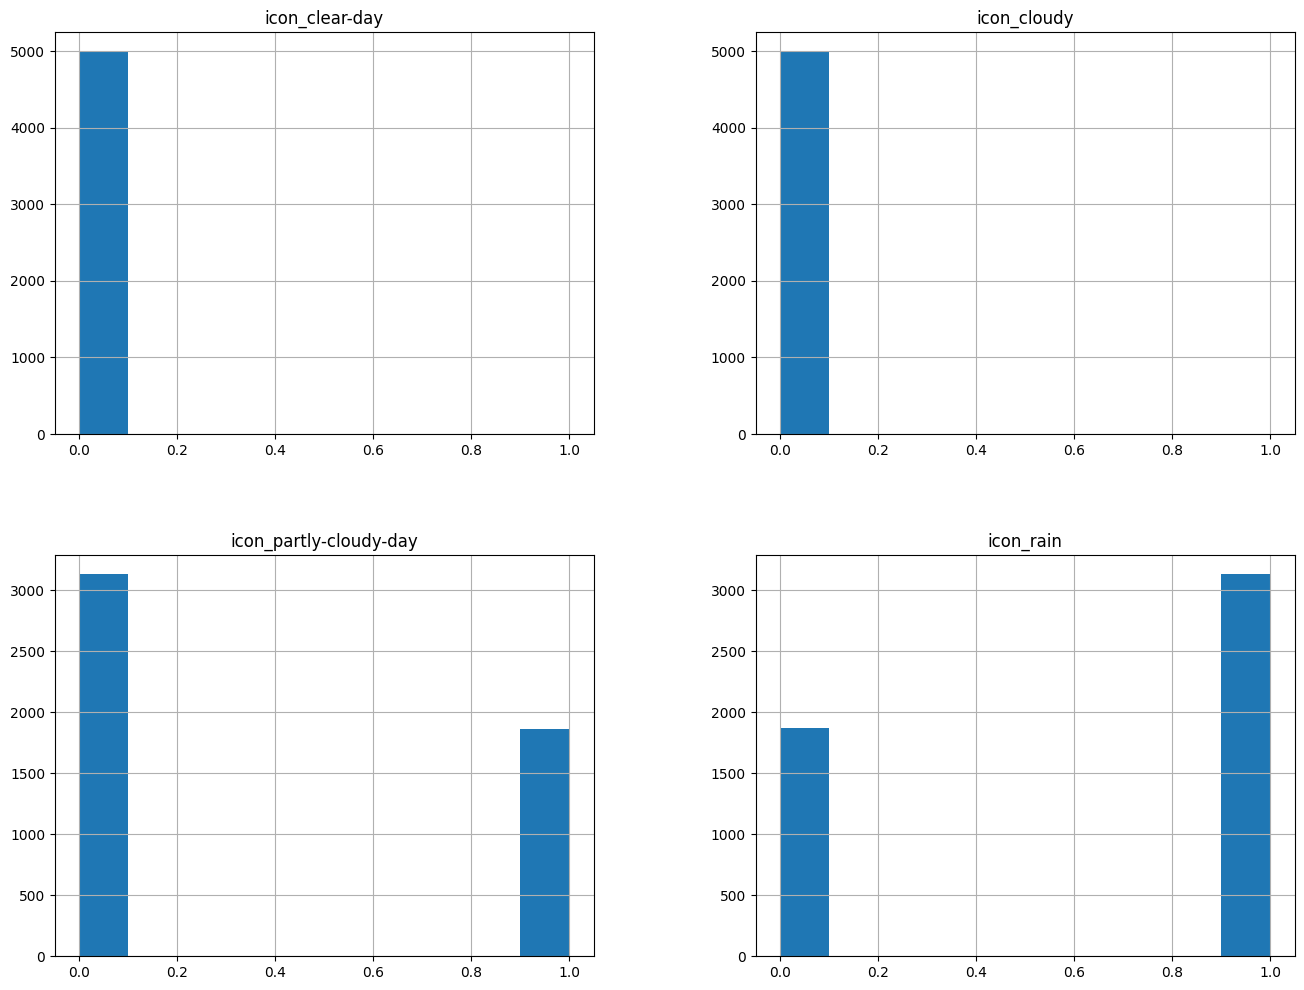

In [18]:
encoded_df.hist(figsize=(16, 12));

**Conclusion**:

- From the above data, we can observe that the weather in Ho Chi Minh City is distinctly divided into two seasons: the rainy season and the dry season. During the dry season, the sky is generally clear with occasional clouds. The remaining period constitutes the rainy season.

## Question 3

**Question**: Can we predict the weather for the day based on the time of sunrise?

**Benefit**: We can predict the weather at the beginning of the day.

**How to answer the question:** We will create a column for sun rise time and plot the data of the first and last year with sun rise time.

In [9]:
#make sunrise time column
temp = raw_data.copy()
sunrise_time = raw_data['sunriseEpoch'] - raw_data['datetimeEpoch']
temp['sunriseTime'] = sunrise_time

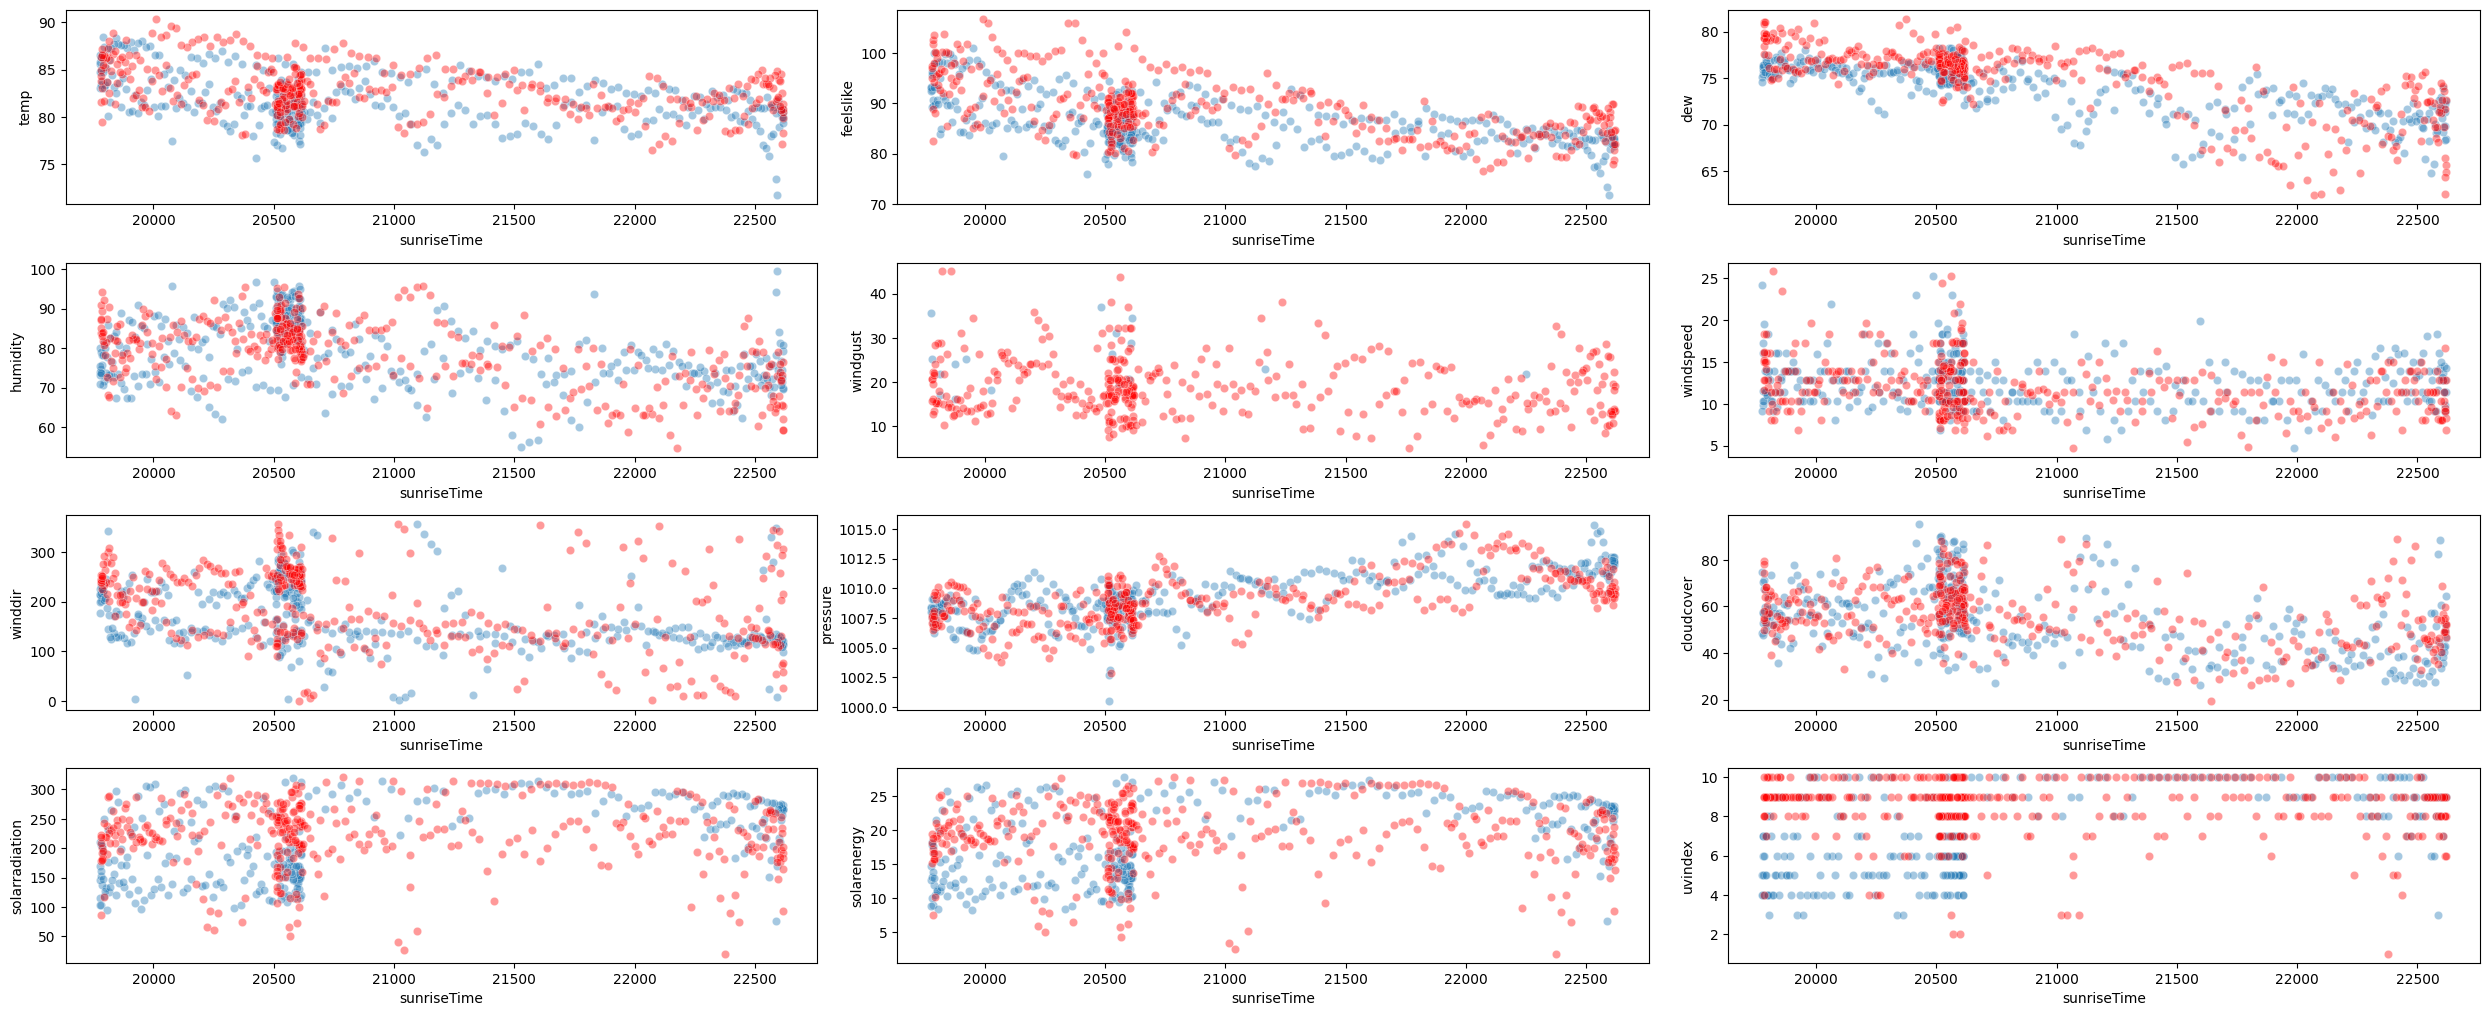

In [10]:
plt.figure(figsize=(25, 25))
cols = ['temp', 'feelslike', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir',
       'pressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex']  # get the column names

for i in range(len(cols)):
    plt.subplot(10, 3, i + 1)  # create a subplot for each column
    sns.scatterplot(x='sunriseTime', y=cols[i], data=temp.head(365), alpha=0.4)
    sns.scatterplot(x='sunriseTime', y=cols[i], data=temp.tail(365), color='r', alpha=0.4)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the figure

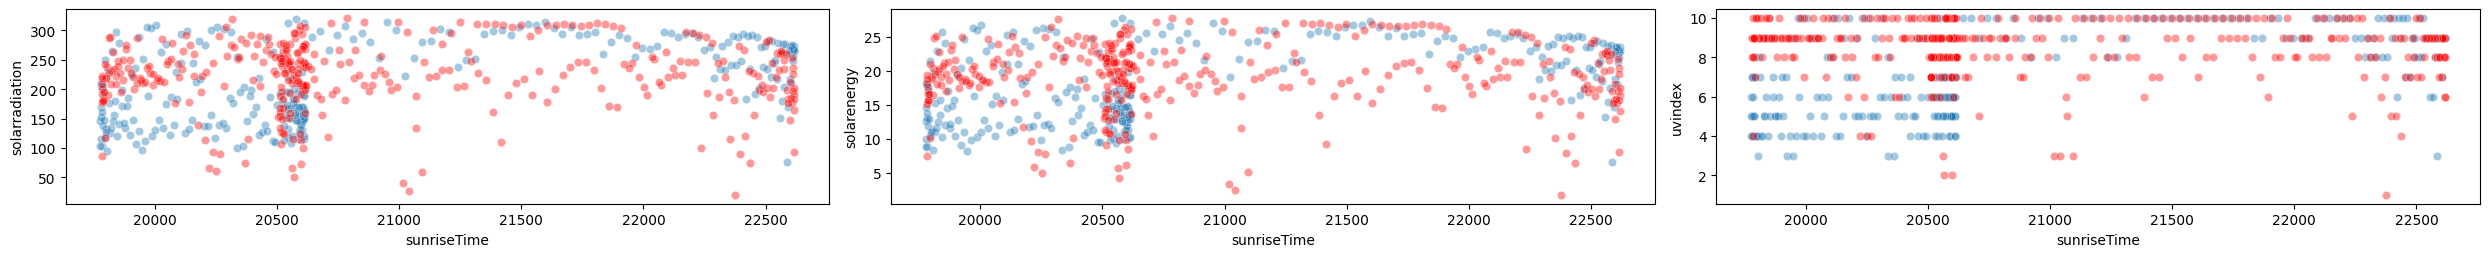

In [11]:
# Plot the special case (solarradiation, solarenergy, uvindex)
plt.figure(figsize=(25, 25))
for i in range(len(cols)-3, len(cols)):
    plt.subplot(10, 3, i + 1)  # create a subplot for each column
    sns.scatterplot(x='sunriseTime', y=cols[i], data=temp.head(365), alpha=0.4)
    sns.scatterplot(x='sunriseTime', y=cols[i], data=temp.tail(365), color='r', alpha=0.4)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the figure

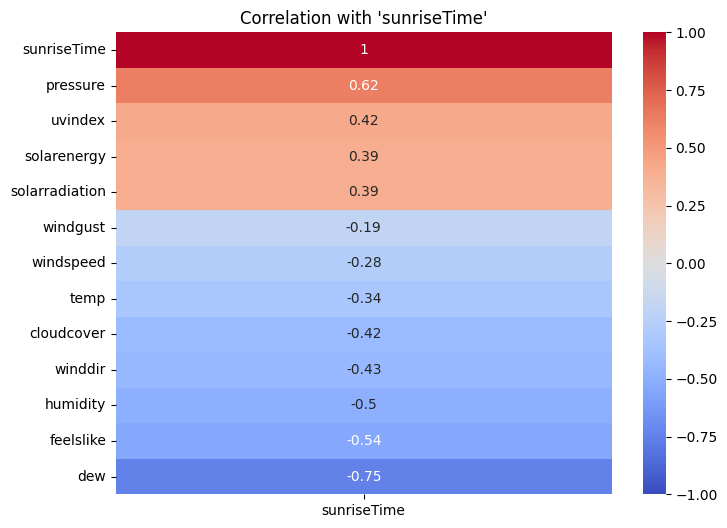

In [12]:
cols.append('sunriseTime')

df = temp[cols].copy()

corr_matrix = df.corr()

# Tạo heatmap chỉ hiển thị mức độ tương quan với cột 'sunriseTime'
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['sunriseTime']].sort_values(by='sunriseTime', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with 'sunriseTime'")
plt.show()

**Conclusion**: <br>
- The `temperature`, `humidity`, `wind speed`, and `cloud cover` tend to `decrease` as the `sunrise time increases`. Conversely, the indices related to `pressure, solar radiation, solar energy`, as well as the `level of UV` rays, tend to `increase`. The `wind direction` also undergoes a `significant change` before and after the threshold time of 20500.

- However, the impact of direct sunlight on 'solarradiation', 'solarenergy', 'uvindex' has significantly decreased between the first and last years. In the most recent year survey, it was observed that the `early sunrise` (before 5:41 AM) `did not contribute` to an increase in `solar radiation`, `solar energy`, and `UV index` as it did in the past (the first year of the survey).

## Question 4

**Question**: What factors influence the sensation of temperature during the day?

**Benefit of solving this question**: Select appropriate factors to predict the perceived temperature.

**How to answer the question**: We will calculate the correlation for each feature with 'feelslike'.

<Figure size 2000x2000 with 0 Axes>

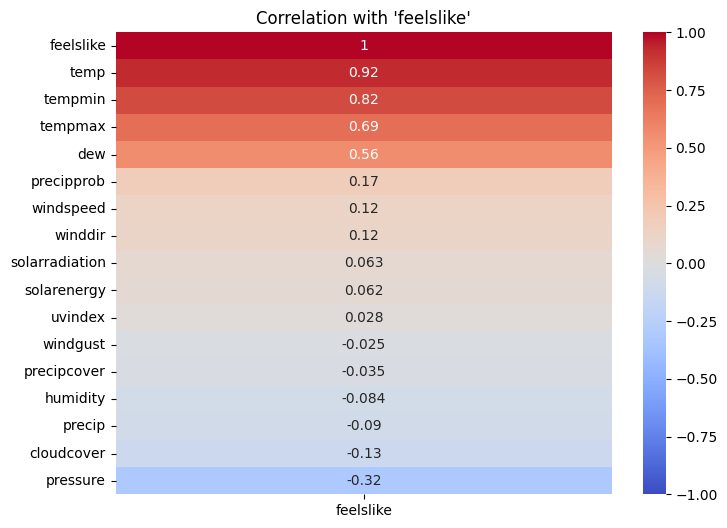

In [13]:
plt.figure(figsize=(20, 20))
cols = list(raw_data_numeric.columns)  # get the column names
remove_cols = ['snow', 'snowdepth', 'visibility', 'sunriseEpoch', 'sunsetEpoch',
               'moonphase', 'datetimeEpoch', 'feelslikemax', 'feelslikemin', 'severerisk']

for col in remove_cols:
  cols.remove(col)

df = raw_data_numeric[cols].copy()

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['feelslike']].sort_values(by='feelslike', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with 'feelslike'")
plt.show()

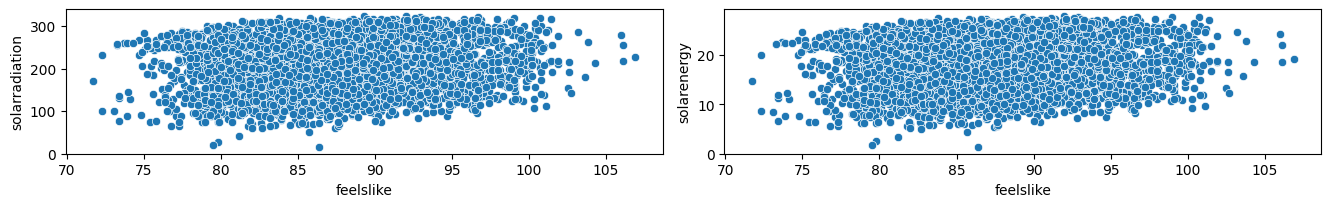

In [14]:
plt.figure(figsize=(20, 20))
cols = ['solarradiation', 'solarenergy']

for i in range(len(cols)):
    plt.subplot(10, 3, i + 1)  # create a subplot for each column
    sns.scatterplot(x='feelslike', y=cols[i], data=raw_data_numeric)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the figure

**Conclusion**:

- The sensation of temperature during the day is heavily affected by temperature, obviously. Surprisingly, `solar energy` and `solar radiation` show a `low level of correlation`. We can also observe that `dew` and `pressure` show a `high correlation` with 'feelslike'. Surprisingly, `tempmin` exhibits a `higher correlation` with `feelslike` compared to `tempmax`.

## Question 5

**Question**: How are outliers distributed over time?

**Benefit of solving this question**: Achieving a reasonable approach in handling outliers. If outliers are concentrated heavily in one particular year, it's advisable not to remove these outliers. However, if the outliers are evenly distributed, they can be removed.

**How to answer the question**: Select a few representative attributes and filter out the outliers. Then, plot graphs for each attribute over time.

In [15]:
outlier_columns = ['datetimeEpoch', 'temp', 'feelslike', 'dew',
           'humidity', 'windspeed', 'pressure', 'cloudcover']

q1 = []
q3 = []
outlier_df = raw_data[outlier_columns+['datetime']].copy()

outlier_df['Year'] = pd.to_datetime(outlier_df['datetime']).dt.year
extreme_outliers = []
for i in range(2009, 2024):
  df = outlier_df[outlier_df['Year'] == i]
  outliers = pd.DataFrame(columns=df.columns)
  for column_name in df.columns:
    if column_name == 'Year' or column_name == 'datetime':
      continue
    # Tính Q1 và Q3 cho mỗi cột
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)

    # Tính IQR cho mỗi cột
    iqr = q3 - q1

    # Tính lower_bound và upper_bound cho từng cột
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Tìm các outlier trong từng cột và thêm vào DataFrame outliers
    sub_outlier = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    outliers = pd.concat([outliers, sub_outlier])

  extreme_outliers.append(outliers)

df = pd.concat(extreme_outliers)

C:\Users\User\AppData\Local\Temp\ipykernel_14320\3617311289.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, sub_outlier])
C:\Users\User\AppData\Local\Temp\ipykernel_14320\3617311289.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, sub_outlier])
C:\Users\User\AppData\Local\Temp\ipykernel_14320\3617311289.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future vers

In [16]:
df

datetimeEpoch  temp  feelslike   dew  humidity  windspeed  pressure  \
24      1256058000  83.7       92.2  78.2      84.6        9.2    1009.3   
0       1253984400  78.9       82.5  76.5      93.0       18.3    1005.5   
2       1254157200  80.5       84.6  76.2      87.0       16.1    1000.5   
3       1254243600  79.3       82.4  76.3      91.7       17.2    1002.7   
11      1254934800  81.5       85.6  76.0      84.6       19.7    1007.3   
...            ...   ...        ...   ...       ...        ...       ...   
4853    1673283600  79.3       82.0  75.1      87.5       13.9    1011.2   
4854    1673370000  80.9       84.3  73.7      79.4       11.4    1010.7   
4917    1678813200  82.0       82.6  67.4      65.1       13.4    1011.0   
4991    1685206800  81.6       88.9  78.5      91.0       15.0    1006.8   
4992    1685293200  83.8       95.1  79.3      87.1       12.8    1007.5   

      cloudcover    datetime  Year  
24          48.8  2009-10-21  2009  
0           87.9  2009-09-27  2009  
2           82.1  2009-09-29  2009  
3           90.0  2009-09-30  2009  
11          65.7  2009-10-08  2009  
...          ...         ...   ...  
4853        79.8  2023-01-10  2023  
4854        85.9  2023-01-11  2023  
4917        19.4  2023-03-15  2023  
4991        79.4  2023-05-28  2023  
4992        78.2  2023-05-29  2023  

[450 rows x 10 columns]

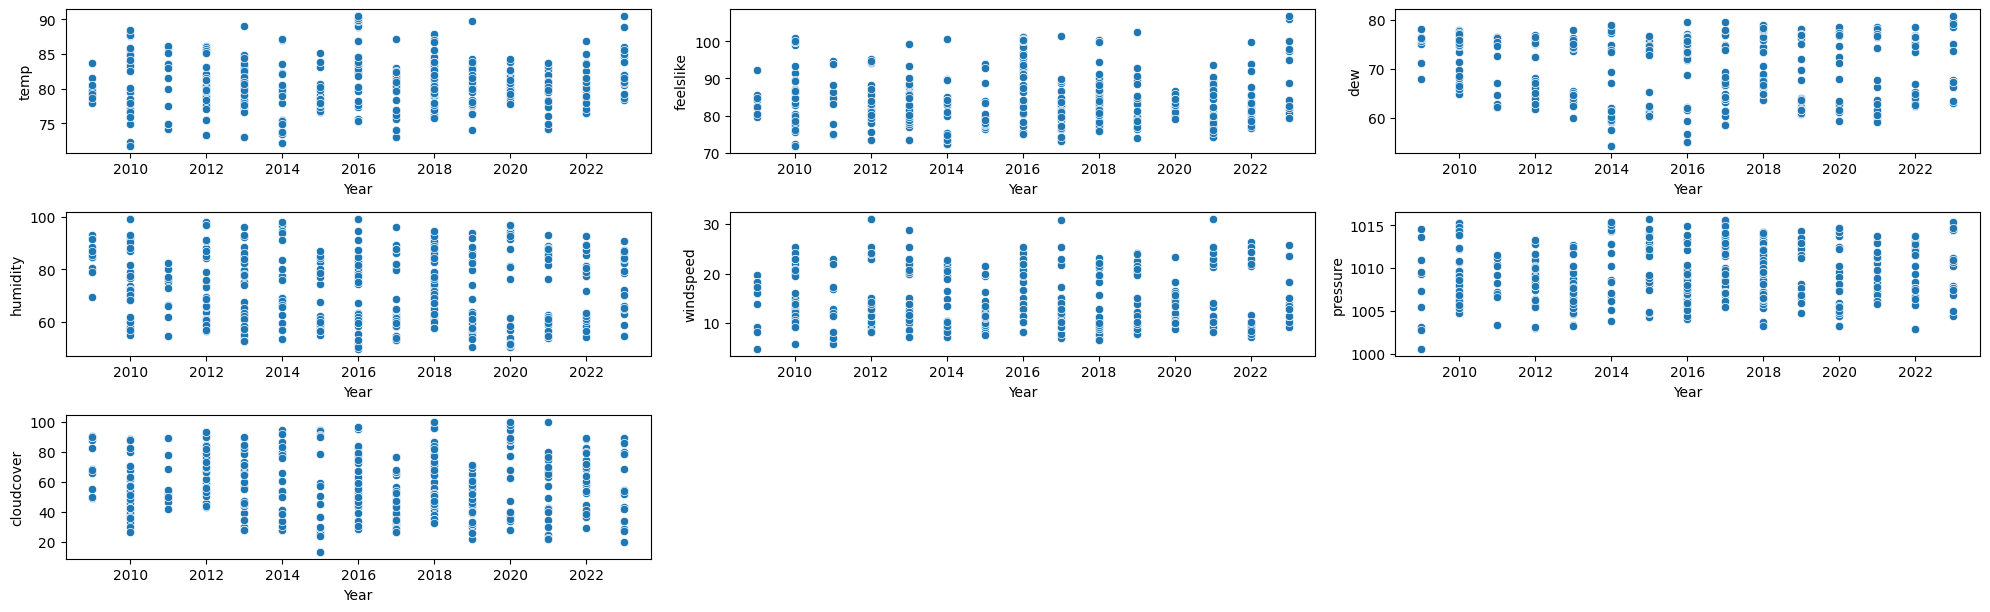

In [17]:
plt.figure(figsize=(20, 20))  # create a new figure with a larger size
cols = list(df.columns)  # get the column names
remove_cols = ['datetimeEpoch', 'datetime', 'Year']
for col in remove_cols:
  cols.remove(col)

for i in range(len(cols)):
  plt.subplot(10, 3, i + 1)  # create a subplot for each column
  sns.scatterplot(x='Year', y=cols[i], data=df)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the figure

**Conclusion**:<br>
- Outliers are `evenly distributed` over time, so we `can removed them from the raw data`.